In [17]:
import numpy as np
import pandas as pd
import os
import shap
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
shap.initjs()
from sklearn.preprocessing import StandardScaler
#mean squared
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn import metrics

data = pd.read_csv('/home/peter/Documents/DSProject/Data00-13.csv')
data14 = pd.read_csv('/home/peter/Documents/DSProject/Data14-14.csv')

In [18]:
data

,State,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,6.3
1,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,8.0,1.145833,4.200,21,6.3
3,Arizona,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,8.0,0.878947,2.200,23,25.0
4,Arizona,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464407,Wyoming,2013-12-30,3.426087,14.5,22,13,0.041000,0.044,8,37,0.000000,0.0,2,8.0,0.025000,0.100,0,1.0
1464408,Wyoming,2013-12-31,1.004167,1.5,16,1,0.042263,0.045,0,38,0.033333,0.3,23,0.0,0.011875,0.044,21,6.3
1464409,Wyoming,2013-12-31,1.004167,1.5,16,1,0.042263,0.045,0,38,0.033333,0.3,23,0.0,0.016667,0.100,0,1.0
1464410,Wyoming,2013-12-31,1.004167,1.5,16,1,0.042263,0.045,0,38,0.025000,0.1,14,8.0,0.011875,0.044,21,6.3


In [19]:
Uta14 = data['State'] == 'California'
Utah14 = data[Uta14]
######################## Daily Seperation
Utah14 = Utah14.groupby('Date Local').mean().reset_index()
UtahDaily2014 = Utah14

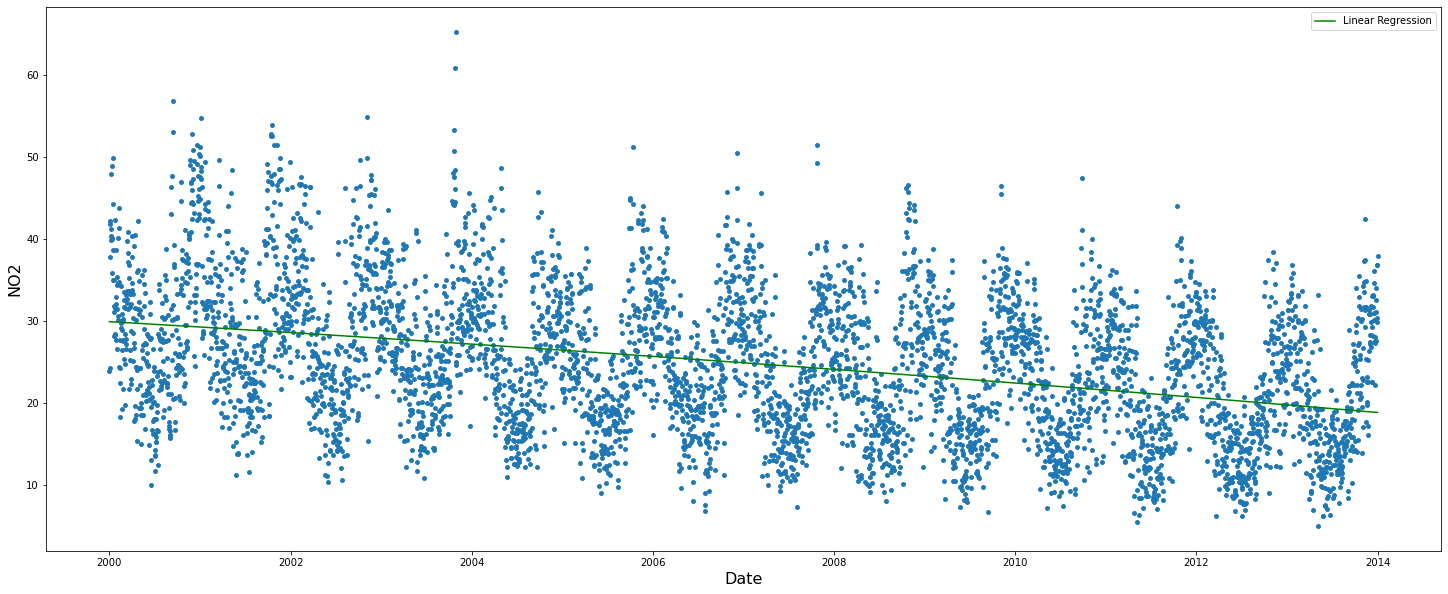

In [20]:
pd.DatetimeIndex(UtahDaily2014['Date Local'])
date = UtahDaily2014['Date Local']
N02 = UtahDaily2014['NO2 AQI']
UtahDaily2014 = pd.DataFrame({'time': date, 'NO2AQI': N02})
UtahDaily2014.time = pd.to_datetime(UtahDaily2014.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(UtahDaily2014.time.values.reshape(-1,1),UtahDaily2014.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(UtahDaily2014.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(UtahDaily2014.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(UtahDaily2014.time.values,UtahDaily2014.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [21]:
UtahDaily2014

,time,NO2AQI
0,2000-01-01,23.904762
1,2000-01-02,24.300000
2,2000-01-03,37.837209
3,2000-01-04,41.818182
4,2000-01-05,42.136364
...,...,...
5109,2013-12-27,36.807692
5110,2013-12-28,29.846154
5111,2013-12-29,30.423077
5112,2013-12-30,36.884615


In [15]:
UtahDaily2014 = UtahDaily2014.drop(UtahDaily2014[UtahDaily2014['NO2AQI'] < UtahDaily2014['NO2AQI'].mean() - 2 * UtahDaily2014['NO2AQI'].std()].index)
UtahDaily2014 = UtahDaily2014.drop(UtahDaily2014[UtahDaily2014['NO2AQI'] > UtahDaily2014['NO2AQI'].mean() + 2 * UtahDaily2014['NO2AQI'].std()].index)

In [16]:
UtahDaily2014

,time,NO2AQI
0,2011-01-01,45.0
1,2011-01-02,46.0
8,2011-01-09,46.0
9,2011-01-10,47.0
14,2011-01-15,44.0
...,...,...
1050,2013-12-22,45.0
1051,2013-12-23,43.0
1056,2013-12-28,42.0
1058,2013-12-30,43.0


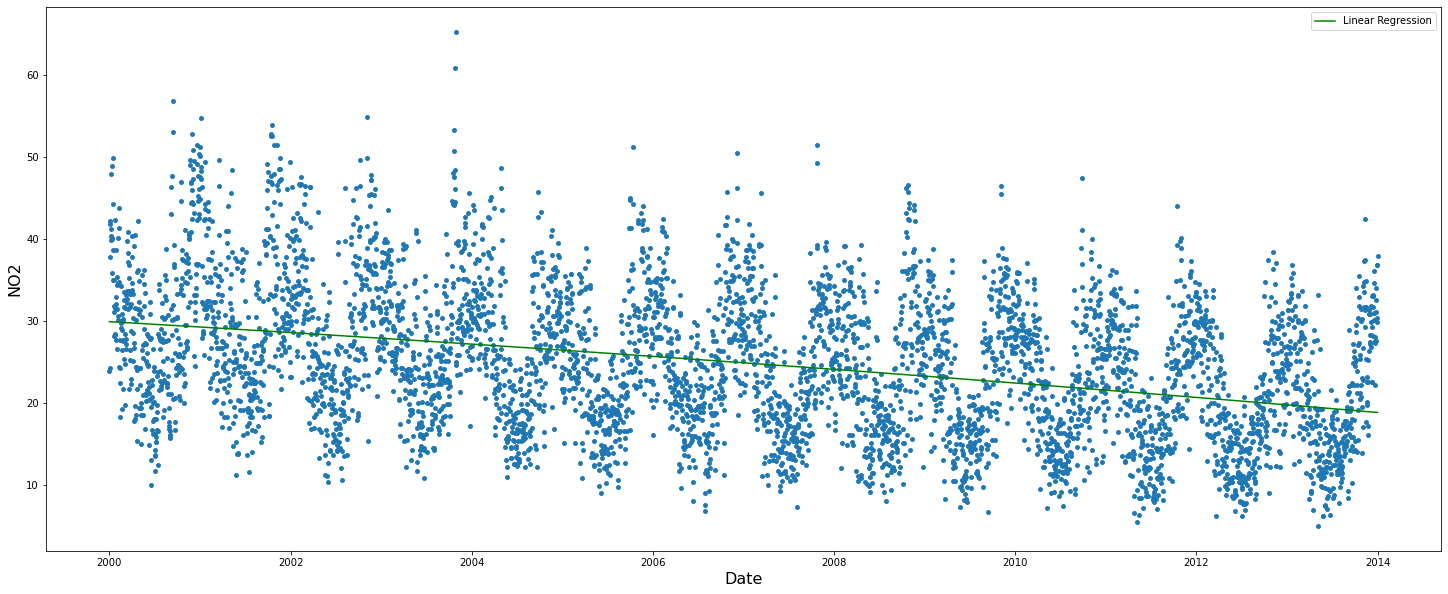

In [22]:
pd.DatetimeIndex(UtahDaily2014['time'])
date = UtahDaily2014['time']
N02 = UtahDaily2014['NO2AQI']
UtahDaily2014 = pd.DataFrame({'time': date, 'NO2AQI': N02})
UtahDaily2014.time = pd.to_datetime(UtahDaily2014.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(UtahDaily2014.time.values.reshape(-1,1),UtahDaily2014.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(UtahDaily2014.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(UtahDaily2014.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(UtahDaily2014.time.values,UtahDaily2014.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [23]:
x = UtahDaily2014['time']
y = UtahDaily2014['NO2AQI']
x = UtahDaily2014.iloc[:,0:1]
y = UtahDaily2014.iloc[:,1:2]

model = LinearRegression()

x.columns = ["time"]
x['time'] = pd.to_datetime(x['time'])
x['time']=x['time'].map(dt.datetime.toordinal)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
model.fit(x_train,y_train)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


LinearRegression()

In [24]:
print(model.coef_)

[[-0.0023005]]


In [25]:
print(model.intercept_)

[1710.30930721]


In [26]:
y_pred = model.predict(x_test)

In [27]:
y_pred

array([[30.5739397 ],
       [27.20831284],
       [29.95510605],
       ...,
       [22.93629022],
       [28.53339901],
       [24.60645092]])

In [28]:
y_test

,NO2AQI
42,22.500000
1505,38.130435
311,37.200000
2863,33.264151
567,18.296296
...,...
4200,17.130435
4319,37.480000
3362,23.269231
929,16.250000


In [30]:
x.head(45)

,time
0,730120
1,730121
2,730122
3,730123
4,730124
5,730125
6,730126
7,730127
8,730128
9,730129


In [31]:
data14

,State,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Alabama,2014-01-01,16.512500,47.1,0,44,0.013250,0.020,10,19,0.363636,2.9,0,3.00,0.204545,0.500,2,4.24
1,Alabama,2014-01-01,16.512500,47.1,0,44,0.013250,0.020,10,19,0.363636,2.9,0,3.00,0.200000,0.500,7,6.00
2,Alabama,2014-01-01,16.512500,47.1,0,44,0.013250,0.020,10,19,0.242857,0.9,5,3.04,0.204545,0.500,2,4.24
3,Alabama,2014-01-01,16.512500,47.1,0,44,0.013250,0.020,10,19,0.242857,0.9,5,3.04,0.200000,0.500,7,6.00
4,Alabama,2014-01-02,3.662500,7.9,6,7,0.018458,0.028,19,26,-0.009091,0.0,0,0.00,0.158824,0.300,16,4.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131584,Wyoming,2014-12-30,7.579167,29.5,20,27,0.025875,0.032,9,30,0.037500,0.2,14,3.04,0.166667,0.200,8,2.00
131585,Wyoming,2014-12-31,4.420833,12.6,0,11,0.041263,0.045,8,42,0.000000,0.0,0,0.00,0.105500,0.146,2,4.24
131586,Wyoming,2014-12-31,4.420833,12.6,0,11,0.041263,0.045,8,42,0.000000,0.0,0,0.00,0.116667,0.200,0,2.00
131587,Wyoming,2014-12-31,4.420833,12.6,0,11,0.041263,0.045,8,42,0.000000,0.0,2,3.04,0.105500,0.146,2,4.24


In [32]:
Uta14 = data14['State'] == 'California'
Utah14 = data14[Uta14]
######################## Daily Seperation
Utah14 = Utah14.groupby('Date Local').mean().reset_index()
UtahDaily2014 = Utah14

In [33]:
Utah14

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2014-01-01,24.289346,38.404000,12.320000,36.160000,0.013580,0.027320,10.160000,25.360000,1.015941,2.148000,7.540000,3.020000,0.791943,1.499260,7.120000,9.540000
1,2014-01-02,25.591108,38.234694,15.142857,35.857143,0.012148,0.024224,9.244898,22.346939,0.970874,1.830612,9.551020,2.632245,0.703262,1.152265,8.285714,7.995102
2,2014-01-03,27.185260,41.058333,15.708333,38.583333,0.010860,0.021083,8.625000,19.458333,0.946873,1.727083,9.854167,2.645000,0.725142,1.156958,8.958333,7.807500
3,2014-01-04,22.811965,35.104167,13.791667,32.916667,0.014672,0.029667,10.791667,27.375000,0.741967,1.360417,11.020833,2.249167,0.692877,1.154688,8.562500,8.036667
4,2014-01-05,18.904070,34.829167,14.416667,32.583333,0.018768,0.033333,9.500000,30.958333,0.647338,1.127083,10.729167,2.124167,0.609391,1.211250,10.270833,8.349167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,13.518655,26.191667,15.000000,24.416667,0.018178,0.031042,8.791667,28.625000,0.453109,0.952083,10.104167,1.936667,0.447466,0.830604,11.500000,6.224167
361,2014-12-28,16.167323,28.191304,17.173913,26.260870,0.015467,0.029913,9.956522,27.652174,0.512240,1.028261,11.391304,1.954783,0.539785,0.973587,9.608696,6.793913
362,2014-12-29,17.224143,28.658333,14.875000,26.791667,0.016636,0.028500,10.750000,26.375000,0.481074,0.927083,9.187500,1.895000,0.603593,1.017375,5.458333,7.495000
363,2014-12-30,11.178826,22.850000,4.500000,21.208333,0.024772,0.032208,11.833333,29.708333,0.323220,0.866667,8.145833,1.999167,0.416751,0.860604,3.062500,6.515833


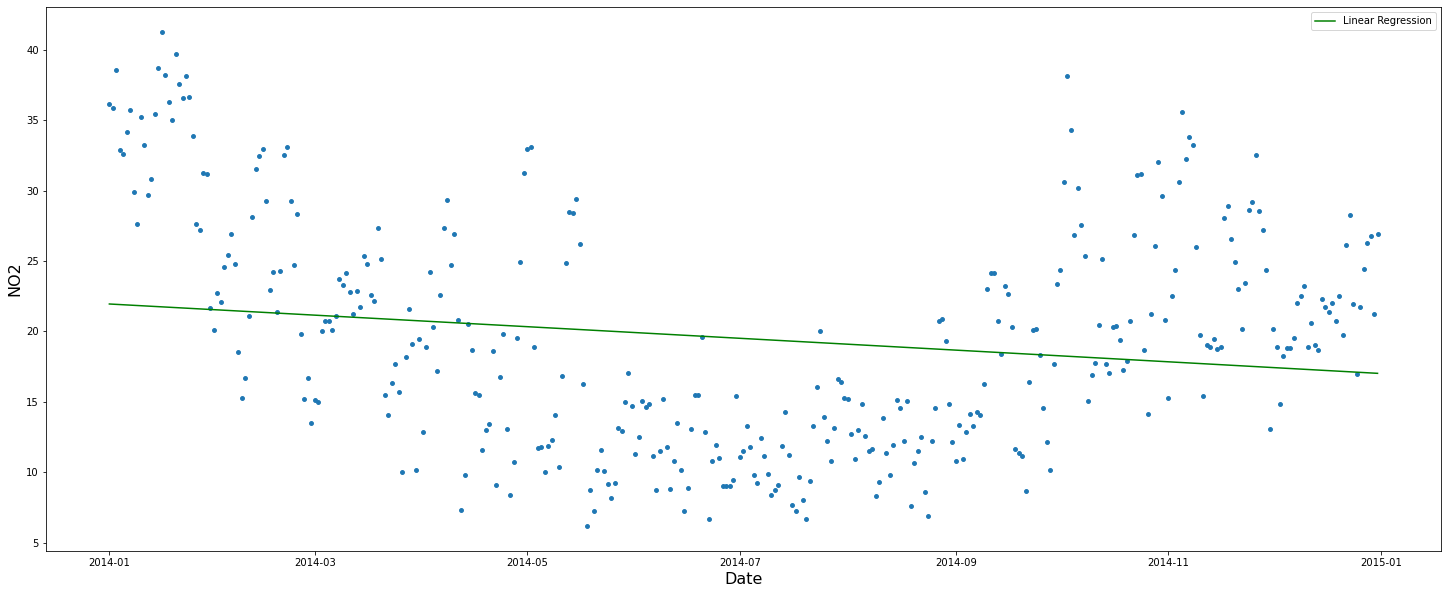

In [34]:
pd.DatetimeIndex(UtahDaily2014['Date Local'])
date = UtahDaily2014['Date Local']
N02 = UtahDaily2014['NO2 AQI']
UtahDaily2014 = pd.DataFrame({'time': date, 'NO2AQI': N02})
UtahDaily2014.time = pd.to_datetime(UtahDaily2014.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(UtahDaily2014.time.values.reshape(-1,1),UtahDaily2014.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(UtahDaily2014.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(UtahDaily2014.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(UtahDaily2014.time.values,UtahDaily2014.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [35]:
UtahDaily2014 = UtahDaily2014.drop(UtahDaily2014[UtahDaily2014['NO2AQI'] < UtahDaily2014['NO2AQI'].mean() - 2 * UtahDaily2014['NO2AQI'].std()].index)
UtahDaily2014 = UtahDaily2014.drop(UtahDaily2014[UtahDaily2014['NO2AQI'] > UtahDaily2014['NO2AQI'].mean() + 2 * UtahDaily2014['NO2AQI'].std()].index)

In [36]:
x = UtahDaily2014['time']
y = UtahDaily2014['NO2AQI']
x = UtahDaily2014.iloc[:,0:1]
y = UtahDaily2014.iloc[:,1:2]

model = LinearRegression()

x.columns = ["time"]
x['time'] = pd.to_datetime(x['time'])
x['time']=x['time'].map(dt.datetime.toordinal)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
model.fit(x_train,y_train)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


LinearRegression()

In [37]:
print(model.coef_)

[[-0.00655925]]


In [38]:
print(model.intercept_)

[4842.47890332]


In [39]:
y_pred = model.predict(x_test)

In [40]:
y_pred

array([[19.83281881],
       [19.4720603 ],
       [18.03558548],
       [19.51797502],
       [17.85848584],
       [18.57344363],
       [18.56032514],
       [19.05226857],
       [19.22280896],
       [18.17332964],
       [17.62891224],
       [19.36711237],
       [18.33731078],
       [18.94732064],
       [19.20969047],
       [18.92108366],
       [18.94076139],
       [17.70762319],
       [18.3832255 ],
       [18.26515908],
       [18.18644813],
       [17.97655227],
       [19.57044898],
       [19.13753877],
       [18.82925421],
       [19.64260069],
       [19.71475239],
       [19.22936821],
       [19.3146384 ],
       [18.66527307],
       [19.39334935],
       [19.41958633],
       [19.45894181],
       [19.06538706],
       [19.45238256],
       [19.1572165 ],
       [18.42258098],
       [18.52752891],
       [19.30151991],
       [19.68195616],
       [17.96999302],
       [18.63903609],
       [18.51441042],
       [17.54364205],
       [17.84536735],
       [19

In [41]:
y_test

,NO2AQI
10,33.280000
65,21.086957
284,20.458333
58,13.500000
311,33.217391
...,...
356,28.260870
155,14.863636
320,28.043478
286,17.666667


In [45]:
x.head(60)

,time
3,735237
4,735238
5,735239
7,735241
8,735242
9,735243
10,735244
11,735245
12,735246
13,735247


In [48]:
y

,NO2AQI
3,32.916667
4,32.583333
5,34.166667
7,29.875000
8,27.666667
...,...
360,24.416667
361,26.260870
362,26.791667
363,21.208333


In [49]:
def calc(x):
    return -9262.69607135 + 0.01267647 * x['time']
x.apply(calc,axis=1)

3      57.513702
4      57.526379
5      57.539055
7      57.564408
8      57.577084
         ...    
360    62.039202
361    62.051878
362    62.064555
363    62.077231
364    62.089908
Length: 350, dtype: float64

In [50]:
x

,time
3,735237
4,735238
5,735239
7,735241
8,735242
...,...
360,735594
361,735595
362,735596
363,735597
